In [1]:
import pandas as pd
import seaborn as sns

In [2]:
no_machine_path = r'new_results\no_machines.txt'
sdata_normal_path = r'new_results\normal.txt'
worker_path = r'new_results\workers_corrected.txt'
worker_10_min_path = r'new_results\workers_all_10_min.txt'

In [3]:
benchmark_base_path = r'C:\Users\huda\Documents\GitHub\scheduling_model\code\upgrades\code\benchmarks\\'

def read_benchmark_file(source, instance):
    if source.startswith('0'):
        target_file = f'0_BehnkeGeiger\Behnke{instance}.fjs'
    elif source.startswith('1'):
        target_file = f'1_Brandimarte\BrandimarteMk{instance}.fjs'
    elif source.startswith('2a'):
        target_file = f'2a_Hurink_sdata\HurinkSdata{instance}.fjs'
    elif source.startswith('2b'):
        target_file = f'2b_Hurink_edata\HurinkEdata{instance}.fjs'
    elif source.startswith('2c'):
        target_file = f'2c_Hurink_rdata\HurinkRdata{instance}.fjs'
    elif source.startswith('2d'):
        target_file = f'2d_Hurink_vdata\HurinkVdata{instance}.fjs'
    elif source.startswith('3'):
        target_file = f'3_DPpaulli\DPpaulli{instance}.fjs'
    elif source.startswith('4'):
        target_file = f'4_ChambersBarnes\ChambersBarnes{instance}.fjs'
    elif source.startswith('5'):
        target_file = f'5_Kacem\Kacem{instance}.fjs'
    elif source.startswith('6'):
        target_file = f'6_Fattahi\Fattahi{instance}.fjs'
    path = benchmark_base_path + f'{target_file}'
    return open(path, 'r').readlines()

In [4]:
def read_data(path :  str) -> list[dict]:
    file_content = []
    data = []
    data_as_dict = dict()
    result = []
    with open(path, 'r') as f:
        file_content = f.readlines()
        all_data = [x.split(';') for x in file_content]
        for data in all_data:
            if data[0].startswith('Error'):
                pass
            else:
                data_as_dict = dict()
                data_as_dict['source'] = data[0]
                data_as_dict['instance'] = int(data[1])
                data_as_dict['fitness'] = int(float(data[2]) + 0.5)
                data_as_dict['ub'] = float(data[3])
                data_as_dict['lb'] = float(data[4])
                data_as_dict['gap'] = float(data[5])
                data_as_dict['status'] = 'optimal' if int(data[6]) == 2 else 'out_of_time'
                data_as_dict['n_explored'] = int(float(data[7]))
                data_as_dict['optimization_time'] = float(data[8])
                data_as_dict['overall_time'] = float(data[9])
                benchmark_data = read_benchmark_file(data_as_dict['source'], data_as_dict['instance'])
                benchmark_system = benchmark_data[0].split(' ')
                data_as_dict['n_machines'] = int(benchmark_system[1])
                data_as_dict['n_jobs'] = int(benchmark_system[0])
                data_as_dict['average_workstations_per_operation'] = float(benchmark_system[2])
                jobs = benchmark_data[1:]
                data_as_dict['n_operations'] = sum([int(x.split(' ')[0]) for x in jobs])
                data_as_dict['average_operations_per_job'] = data_as_dict['n_operations'] / data_as_dict['n_jobs']
                data_as_dict['beta_flexibility'] = data_as_dict['average_workstations_per_operation']/data_as_dict['n_machines']
                # ignore actual solution data for now
                result.append(data_as_dict)
    return result

In [5]:
fixed_assignments_data = read_data(no_machine_path)
sdata_normal_data = read_data(sdata_normal_path)
worker_data = read_data(worker_path)
worker_10_min_data = read_data(worker_10_min_path)

In [6]:
fixed_assignments_df = pd.DataFrame(fixed_assignments_data)
sdata_df = pd.DataFrame(sdata_normal_data)
worker_df = pd.DataFrame(worker_data)
worker_10_min_df = pd.DataFrame(worker_10_min_data)

In [7]:
fixed_assignments_df.head(0)

,source,instance,fitness,ub,lb,gap,status,n_explored,optimization_time,overall_time,n_machines,n_jobs,average_workstations_per_operation,n_operations,average_operations_per_job,beta_flexibility


### Compare Gurobi with fixed assignments to normal Gurobi model

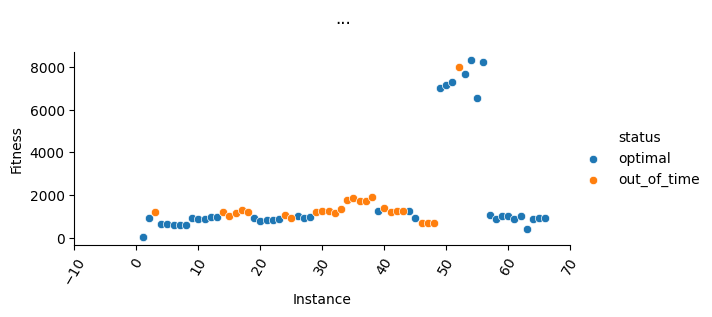

In [8]:
fg = sns.FacetGrid(data=fixed_assignments_df, hue='status', aspect=2)
fg.fig.suptitle("...")
fg.map_dataframe(sns.scatterplot, x='instance', y='fitness').add_legend().set_xticklabels(rotation=60)
fg.set_ylabels('Fitness')
fg.set_xlabels('Instance')

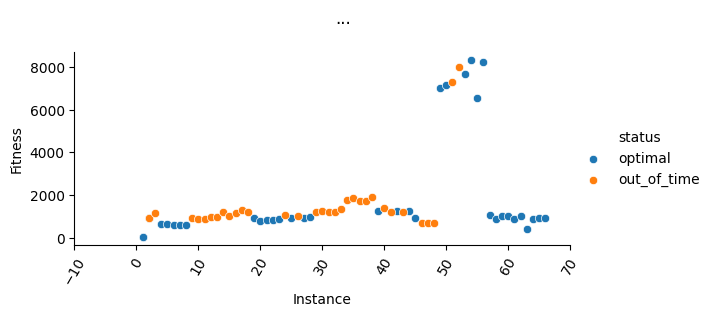

In [9]:
fg = sns.FacetGrid(data=sdata_df, hue='status', aspect=2)
fg.fig.suptitle("...")
fg.map_dataframe(sns.scatterplot, x='instance', y='fitness').add_legend().set_xticklabels(rotation=60)
fg.set_ylabels('Fitness')
fg.set_xlabels('Instance')

<AxesSubplot: xlabel='instance', ylabel='fitness'>

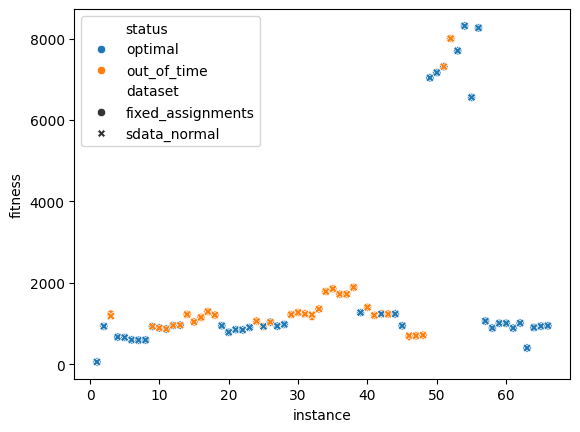

In [10]:
concatenated = pd.concat([fixed_assignments_df.assign(dataset='fixed_assignments'), sdata_df.assign(dataset='sdata_normal')])
sns.scatterplot(x='instance', y='fitness', data=concatenated, hue='status', style='dataset')

<AxesSubplot: xlabel='instance', ylabel='optimization_time'>

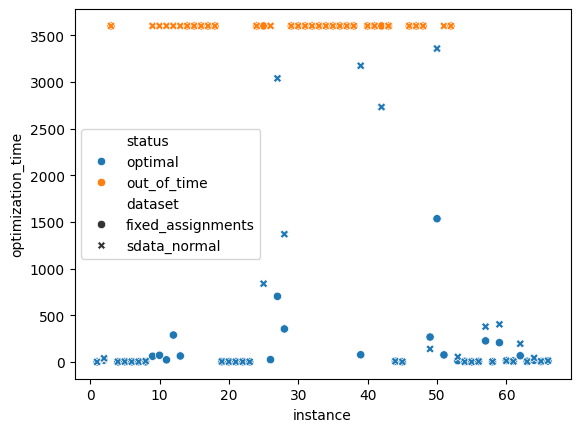

In [11]:
sns.scatterplot(x='instance', y='optimization_time', data=concatenated, hue='status', style='dataset')

<AxesSubplot: xlabel='instance', ylabel='overall_time'>

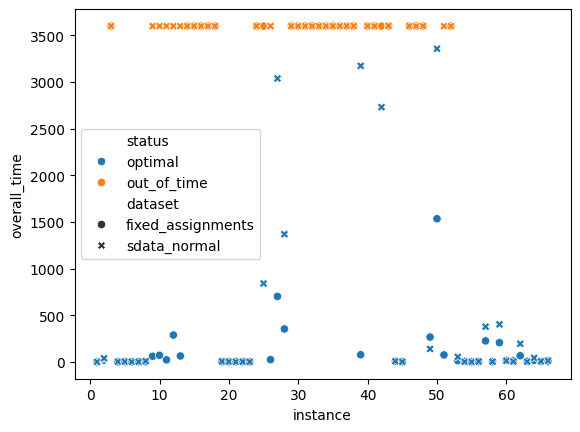

In [12]:
sns.scatterplot(x='instance', y='overall_time', data=concatenated, hue='status', style='dataset')

<AxesSubplot: xlabel='instance', ylabel='gap'>

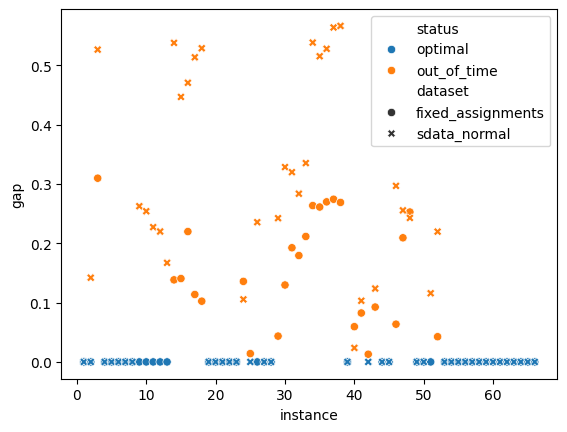

In [13]:
sns.scatterplot(x='instance', y='gap', data=concatenated, hue='status', style='dataset')

### Include Workers

<AxesSubplot: xlabel='instance', ylabel='overall_time'>

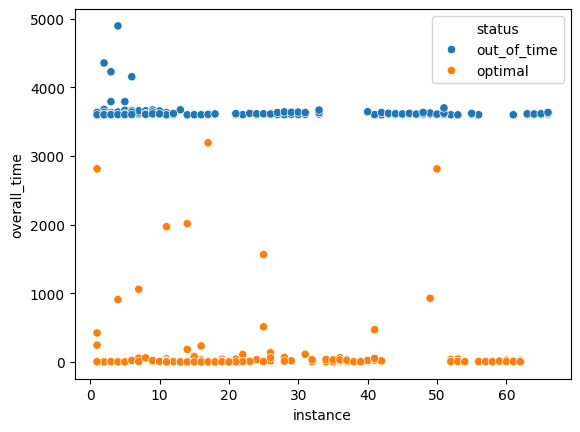

In [14]:
sns.scatterplot(x='instance', y='overall_time', data=worker_df, hue='status')

<AxesSubplot: xlabel='status', ylabel='count'>

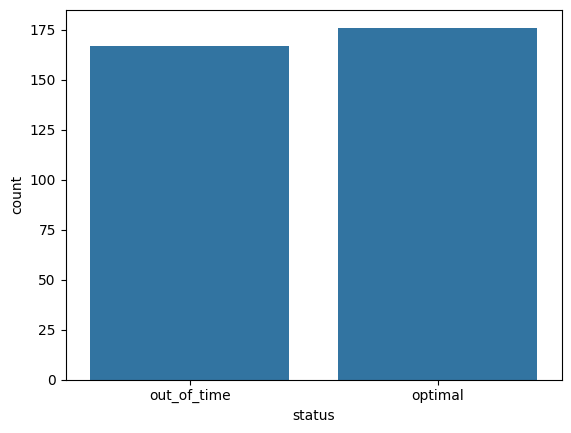

In [15]:
sns.countplot(data=worker_df, x='status')

[0.0, 0.3333333333333333, 0.48484848484848486, 0.5303030303030303, 0.5151515151515151, 0.4696969696969697, 0.2222222222222222, 1.0, 1.0, 0.55]


<AxesSubplot: xlabel='status', ylabel='count'>

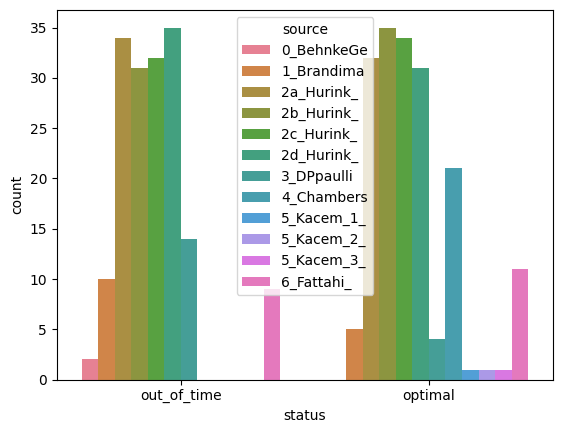

In [36]:
sns.countplot(data=worker_df, x='status', hue='source')

[0.0, 0.3333333333333333, 0.48484848484848486, 0.5303030303030303, 0.5151515151515151, 0.4696969696969697, 0.2222222222222222, 1.0, 1.0, 0.55]


<AxesSubplot: ylabel='success_rate'>

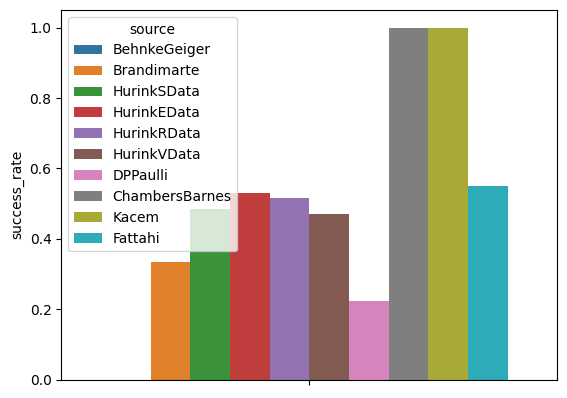

In [39]:
source_count = [0] * 10
success_count = [0] * 10
for index, row in worker_df.iterrows():
    idx = int(row['source'][0])
    if idx >= 2:
        if row['source'].startswith('2a'):
            idx = 2
        elif row['source'].startswith('2b'):
            idx = 3
        elif row['source'].startswith('2c'):
            idx = 4
        elif row['source'].startswith('2d'):
            idx = 5
        else:
            idx += 3
    source_count[idx] += 1
    if row['status'] == 'optimal':
        success_count[idx] += 1
success_rates = [success_count[i] / source_count[i] for i in range(len(source_count))]
print(success_rates)
plot_data = [
    {
        'source': 'BehnkeGeiger',
        'success_rate': success_rates[0]
    },
    {
        'source': 'Brandimarte',
        'success_rate': success_rates[1]
    },
    {
        'source': 'HurinkSData',
        'success_rate': success_rates[2]
    },
    {
        'source': 'HurinkEData',
        'success_rate': success_rates[3]
    },
    {
        'source': 'HurinkRData',
        'success_rate': success_rates[4]
    },
    {
        'source': 'HurinkVData',
        'success_rate': success_rates[5]
    },
    {
        'source': 'DPPaulli',
        'success_rate': success_rates[6]
    },
    {
        'source': 'ChambersBarnes',
        'success_rate': success_rates[7]
    },
    {
        'source': 'Kacem',
        'success_rate': success_rates[8]
    },
    {
        'source': 'Fattahi',
        'success_rate': success_rates[9]
    },
    
]
plot_df = pd.DataFrame(plot_data)
sns.barplot(data=plot_df, y='success_rate', hue='source')

[0.0, 0.26666666666666666, 0.48484848484848486, 0.48484848484848486, 0.5151515151515151, 0.4393939393939394, 0.16666666666666666, 1.0, 0.5, 0.5]


<AxesSubplot: ylabel='success_rate'>

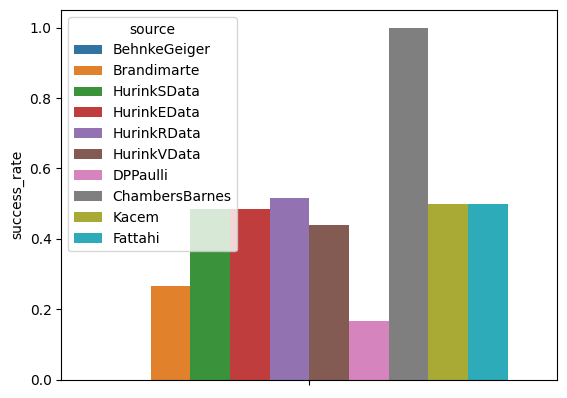

In [41]:
source_count = [0] * 10
success_count = [0] * 10
for index, row in worker_10_min_df.iterrows():
    idx = int(row['source'][0])
    if idx >= 2:
        if row['source'].startswith('2a'):
            idx = 2
        elif row['source'].startswith('2b'):
            idx = 3
        elif row['source'].startswith('2c'):
            idx = 4
        elif row['source'].startswith('2d'):
            idx = 5
        else:
            idx += 3
    source_count[idx] += 1
    if row['status'] == 'optimal':
        success_count[idx] += 1
success_rates = [success_count[i] / source_count[i] if source_count[i] > 0 else 0.0 for i in range(len(source_count))]
print(success_rates)
plot_data = [
    {
        'source': 'BehnkeGeiger',
        'success_rate': success_rates[0]
    },
    {
        'source': 'Brandimarte',
        'success_rate': success_rates[1]
    },
    {
        'source': 'HurinkSData',
        'success_rate': success_rates[2]
    },
    {
        'source': 'HurinkEData',
        'success_rate': success_rates[3]
    },
    {
        'source': 'HurinkRData',
        'success_rate': success_rates[4]
    },
    {
        'source': 'HurinkVData',
        'success_rate': success_rates[5]
    },
    {
        'source': 'DPPaulli',
        'success_rate': success_rates[6]
    },
    {
        'source': 'ChambersBarnes',
        'success_rate': success_rates[7]
    },
    {
        'source': 'Kacem',
        'success_rate': success_rates[8]
    },
    {
        'source': 'Fattahi',
        'success_rate': success_rates[9]
    },
    
]
plot_df = pd.DataFrame(plot_data)
sns.barplot(data=plot_df, y='success_rate', hue='source')

<AxesSubplot: xlabel='n_operations', ylabel='overall_time'>

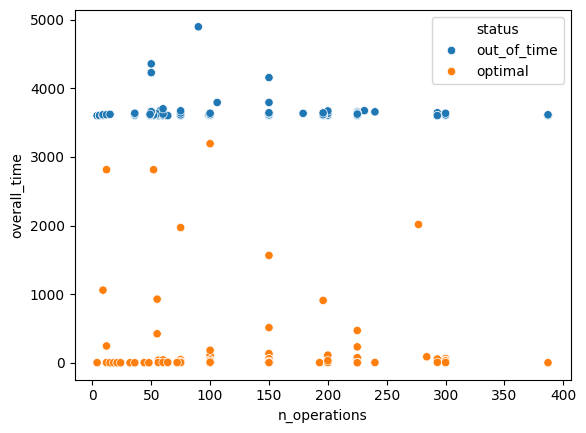

In [16]:
sns.scatterplot(x='n_operations', y='overall_time', data=worker_df, hue='status')

<AxesSubplot: xlabel='n_operations', ylabel='overall_time'>

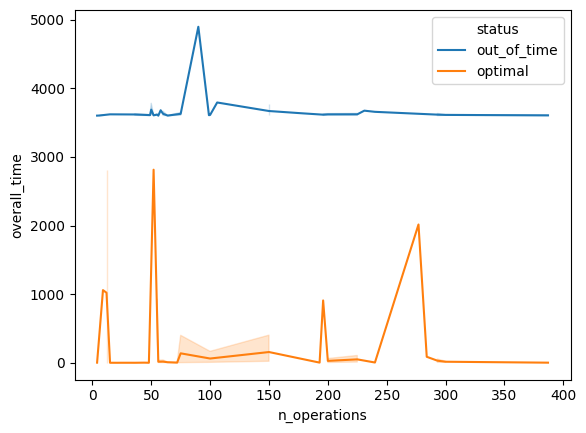

In [17]:
sns.lineplot(x='n_operations', y='overall_time', data=worker_df, hue='status')

<AxesSubplot: xlabel='n_operations', ylabel='optimization_time'>

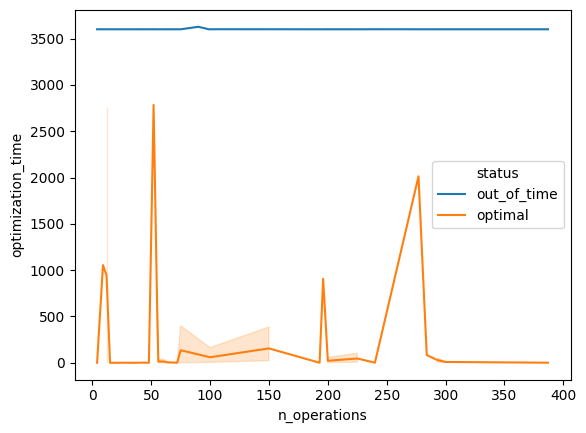

In [18]:
sns.lineplot(x='n_operations', y='optimization_time', data=worker_df, hue='status')

<AxesSubplot: xlabel='optimization_time', ylabel='beta_flexibility'>

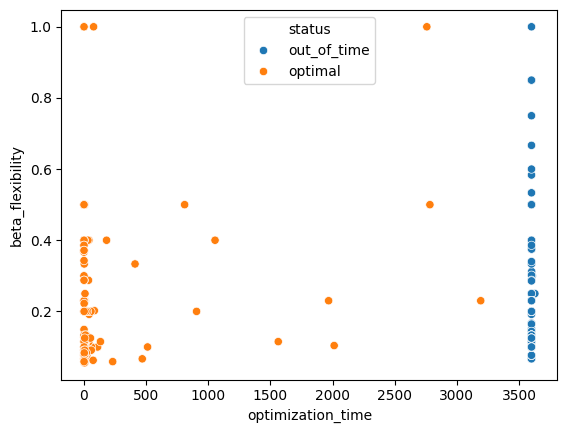

In [27]:
sns.scatterplot(x='optimization_time', y='beta_flexibility', data=worker_df, hue='status')

<AxesSubplot: xlabel='n_operations', ylabel='gap'>

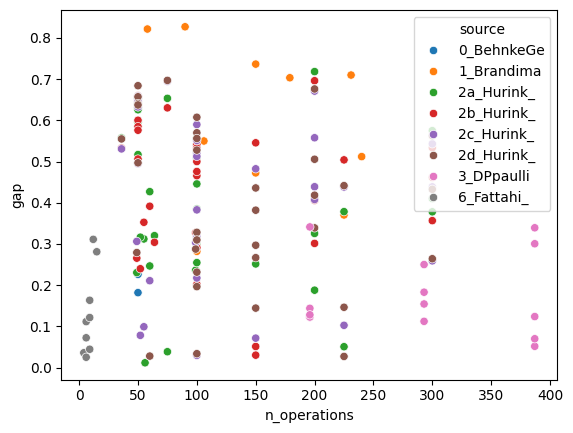

In [31]:
sns.scatterplot(x='n_operations', y='gap', data=worker_df.loc[(worker_df['status'] == 'out_of_time')], hue='source')

<AxesSubplot: xlabel='beta_flexibility', ylabel='gap'>

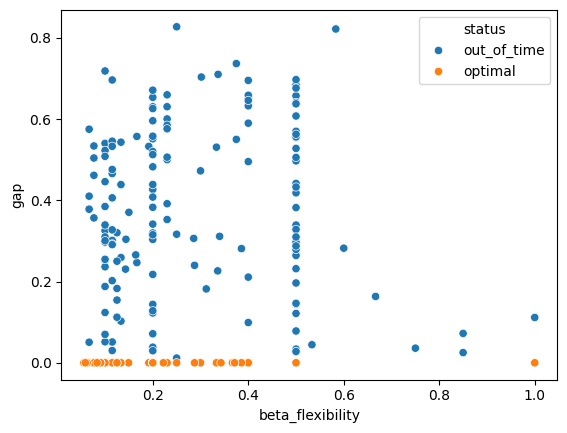

In [42]:
sns.scatterplot(x='beta_flexibility', y='gap', data=worker_df, hue='status')

<AxesSubplot: xlabel='beta_flexibility', ylabel='gap'>

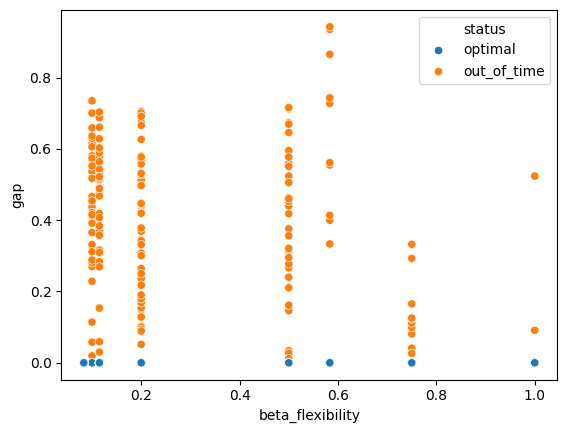

In [43]:
sns.scatterplot(x='beta_flexibility', y='gap', data=worker_10_min_df, hue='status')